In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer

q = QuantumRegister(4)
c = ClassicalRegister(3)

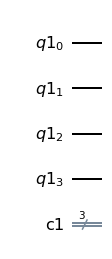

In [4]:
qc = QuantumCircuit(q, c)
qc.draw()

In [5]:
A = 1
B = 1
C = 1
D = 1

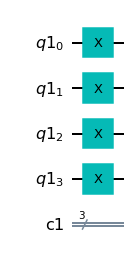

In [6]:
# encode sides
if A == 1:
   qc.x(q[0])
if B == 1:
   qc.x(q[1])
if C == 1:
   qc.x(q[2])
if D == 1:
   qc.x(q[3])
qc.draw()

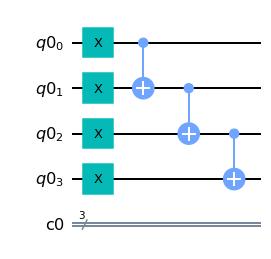

In [13]:
# compare sides
qc.cx(q[0], q[1])
qc.cx(q[1], q[2])
qc.cx(q[2], q[3])
qc.draw()

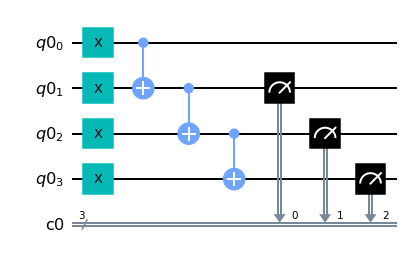

In [14]:
# measure qubits
qc.measure(q[1], c[0])
qc.measure(q[2], c[1])
qc.measure(q[3], c[2])
qc.draw()

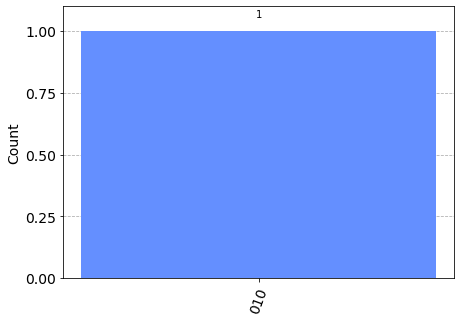

In [15]:
# run simulation
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1).result()
counts = result.get_counts(qc)

#Plot Counts Histogram
plot_histogram(result.get_counts(qc))

In [ ]:
# check if rectangle is possible
if '111' in counts:
    return 1
else:
    return 0

In [9]:


    


    # check if rectangle is possible
    if '111' in counts:
        return 1
    else:
        return 0

# test the function
print(is_rectangle_possible(1, 1, 1, 1))  # output: 1
#print(is_rectangle_possible(2, 3, 4, 5))  # output: 0

SyntaxError: 'return' outside function (869383938.py, line 3)

In [ ]:
def is_rectangle(a, b, c, d):
    # check if all angles are right angles
    if a**2 + b**2 == c**2 + d**2:
        return True
    elif a**2 + c**2 == b**2 + d**2:
        return True
    elif a**2 + d**2 == b**2 + c**2:
        return True
    else:
        return False

In [21]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute

def is_rectangle_on_qc(a, b, c, d):
    # Determine the number of qubits required to encode the input values
    num_qubits = len(bin(max(a, b, c, d))) - 2

    # Initialize quantum and classical registers
    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(1, 'c')
    qc = QuantumCircuit(qr, cr)

    # Encode the input values as binary numbers
    a_bits = [int(i) for i in bin(a)[2:].zfill(num_qubits)]
    b_bits = [int(i) for i in bin(b)[2:].zfill(num_qubits)]
    c_bits = [int(i) for i in bin(c)[2:].zfill(num_qubits)]
    d_bits = [int(i) for i in bin(d)[2:].zfill(num_qubits)]

    # Apply the Pythagorean theorem using quantum gates
    for i in range(num_qubits):
        qc.cx(qr[i], qr[(num_qubits-1) + i])
        qc.cx(qr[i], qr[1 * (num_qubits-1) + i])
        qc.ccx(qr[i], qr[(num_qubits-1) + i], qr[1 * (num_qubits-1) + i])
        qc.cx(qr[1 * (num_qubits-1) + i], qr[2 * (num_qubits-1) + i])

    # Measure the last qubit to obtain the result
    qc.measure(qr[2 * (num_qubits-1) - 1], cr)

    # Execute the circuit and return the result
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1)
    result = next(iter(job.result().get_counts()))  # Get the result as a bit string
    return int(result)

In [19]:
print(is_rectangle_on_qc(3, 4, 3, 4))  # output: 1

Traceback (most recent call last):
  Input In [19] in <cell line: 1>
    print(is_rectangle_on_qc(3, 4, 3, 4))  # output: 1
  Input In [18] in is_rectangle_on_qc
    qc.cx(qr[i], qr[num_qubits + i])
  File /opt/conda/lib/python3.8/site-packages/qiskit/circuit/register.py:173 in __getitem__
    return self._bits[key]
IndexError: list index out of range

Use %tb to get the full traceback.
